# Continuous Control

---

In this notebook, you will learn how to use the Unity ML-Agents environment for the second project of the [Deep Reinforcement Learning Nanodegree](https://www.udacity.com/course/deep-reinforcement-learning-nanodegree--nd893) program.

### 1. Start the Environment

We begin by importing the necessary packages.  If the code cell below returns an error, please revisit the project instructions to double-check that you have installed [Unity ML-Agents](https://github.com/Unity-Technologies/ml-agents/blob/master/docs/Installation.md) and [NumPy](http://www.numpy.org/).

In [1]:
from unityagents import UnityEnvironment
import numpy as np

Next, we will start the environment!  **_Before running the code cell below_**, change the `file_name` parameter to match the location of the Unity environment that you downloaded.

- **Mac**: `"path/to/Reacher.app"`
- **Windows** (x86): `"path/to/Reacher_Windows_x86/Reacher.exe"`
- **Windows** (x86_64): `"path/to/Reacher_Windows_x86_64/Reacher.exe"`
- **Linux** (x86): `"path/to/Reacher_Linux/Reacher.x86"`
- **Linux** (x86_64): `"path/to/Reacher_Linux/Reacher.x86_64"`
- **Linux** (x86, headless): `"path/to/Reacher_Linux_NoVis/Reacher.x86"`
- **Linux** (x86_64, headless): `"path/to/Reacher_Linux_NoVis/Reacher.x86_64"`

For instance, if you are using a Mac, then you downloaded `Reacher.app`.  If this file is in the same folder as the notebook, then the line below should appear as follows:
```
env = UnityEnvironment(file_name="Reacher.app")
```

In [2]:
env = UnityEnvironment(file_name='./Reacher.exe')

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		goal_speed -> 1.0
		goal_size -> 5.0
Unity brain name: ReacherBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 33
        Number of stacked Vector Observation: 1
        Vector Action space type: continuous
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


Environments contain **_brains_** which are responsible for deciding the actions of their associated agents. Here we check for the first brain available, and set it as the default brain we will be controlling from Python.

In [3]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

### 2. Examine the State and Action Spaces

In this environment, a double-jointed arm can move to target locations. A reward of `+0.1` is provided for each step that the agent's hand is in the goal location. Thus, the goal of your agent is to maintain its position at the target location for as many time steps as possible.

The observation space consists of `33` variables corresponding to position, rotation, velocity, and angular velocities of the arm.  Each action is a vector with four numbers, corresponding to torque applicable to two joints.  Every entry in the action vector must be a number between `-1` and `1`.

Run the code cell below to print some information about the environment.

In [4]:
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents
num_agents = len(env_info.agents)
print('Number of agents:', num_agents)

# size of each action
action_size = brain.vector_action_space_size
print('Size of each action:', action_size)

# examine the state space 
states = env_info.vector_observations
state_size = states.shape[1]
print('There are {} agents. Each observes a state with length: {}'.format(states.shape[0], state_size))
print('The state for the first agent looks like:', states[0])

Number of agents: 1
Size of each action: 4
There are 1 agents. Each observes a state with length: 33
The state for the first agent looks like: [ 0.00000000e+00 -4.00000000e+00  0.00000000e+00  1.00000000e+00
 -0.00000000e+00 -0.00000000e+00 -4.37113883e-08  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00 -1.00000000e+01  0.00000000e+00
  1.00000000e+00 -0.00000000e+00 -0.00000000e+00 -4.37113883e-08
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  5.75471878e+00 -1.00000000e+00
  5.55726671e+00  0.00000000e+00  1.00000000e+00  0.00000000e+00
 -1.68164849e-01]


### 3. Take Random Actions in the Environment

In the next code cell, you will learn how to use the Python API to control the agent and receive feedback from the environment.

Once this cell is executed, you will watch the agent's performance, if it selects an action at random with each time step.  A window should pop up that allows you to observe the agent, as it moves through the environment.  

Of course, as part of the project, you'll have to change the code so that the agent is able to use its experience to gradually choose better actions when interacting with the environment!

In [5]:
env_info = env.reset(train_mode=False)[brain_name]     # reset the environment    
states = env_info.vector_observations                  # get the current state (for each agent)
scores = np.zeros(num_agents)                          # initialize the score (for each agent)
count=0
while True:
    actions = np.random.randn(num_agents, action_size) # select an action (for each agent)
    actions = np.clip(actions, -1, 1)                  # all actions between -1 and 1
    #print(type(actions))
    #print(actions.shape)
    env_info = env.step(actions)[brain_name]           # send all actions to tne environment
    next_states = env_info.vector_observations         # get next state (for each agent)
    rewards = env_info.rewards                         # get reward (for each agent)
    dones = env_info.local_done                        # see if episode finished
    scores += env_info.rewards                         # update the score (for each agent)
    states = next_states                               # roll over states to next time step
    #print(dones)
    if np.any(dones):                                  # exit loop if episode finished
        break
    count+=1
    if count ==100:
        break
    
print('Total score (averaged over agents) this episode: {}'.format(np.mean(scores)))

Total score (averaged over agents) this episode: 0.0


When finished, you can close the environment.

In [6]:
#env.close()

### 4. It's Your Turn!

Now it's your turn to train your own agent to solve the environment!  When training the environment, set `train_mode=True`, so that the line for resetting the environment looks like the following:
```python
env_info = env.reset(train_mode=True)[brain_name]
```

In [7]:
import torch
import copy
import torch.nn as nn
from torch.nn import functional as F
import torch.optim as optim
from collections import namedtuple, deque
import numpy as np
import random

In [8]:
## Hyperparameters

BUFFER_SIZE = int(1e5)  ##Total memory length
BATCH_SIZE = 128        ## minibatch size
GAMMA = 0.99            ## discount factor
TAU = 1e-3              ## for soft update of target parameters
LR_ACTOR = 1e-4         ## Learning Rate for Actor
LR_CRITIC = 1e-4        ## Learning Rate for Critic
WEIGHT_DECAY=0          ## Weight Decay

device = torch.device("cuda:0" if  torch.cuda.is_available() else 'cpu')

In [9]:
## Actor Critic Models Definations

In [10]:
## for Uniform initialization of model layers
## You may try normal initialization

def init_hidden(layer):
    input_size = layer.weight.data.size()[0]
    lim = 1./np.sqrt(input_size)
    return (-lim,lim)


In [11]:
##Actor 

class Actor(nn.Module):
    '''
    Actor Model
    '''
    def __init__(self, state_size, action_size,hidden_size1=256,hidden_size2=128,seed =0 ):
        """
        Initialize parameters and build model
        """
        super(Actor, self).__init__()
        self.seed =torch.manual_seed(seed)
        self.state_size = state_size
        self.action_size = action_size
        self.hidden_size1 = hidden_size1
        self.hidden_size2 = hidden_size2
        
        self.FC1 = nn.Linear(self.state_size, self.hidden_size1)
        self.FC2 = nn.Linear(self.hidden_size1, self.hidden_size2)
        self.FC3 = nn.Linear(self.hidden_size2, self.action_size)
        self.reset_parameters()
        
    def forward(self, state):
        
        x =  F.relu(self.FC1(state))
        x =  F.relu(self.FC2(x))
        x =  torch.tanh(self.FC3(x))
        
        return x
    
    def reset_parameters(self):
        self.FC1.weight.data.uniform_(*init_hidden(self.FC1))
        self.FC2.weight.data.uniform_(*init_hidden(self.FC2))
        self.FC3.weight.data.uniform_(-3e-3,3e-3)
    

In [12]:
##Critic

class Critic(nn.Module):
    '''
    Actor Model
    '''
    def __init__(self, state_size, action_size,hidden_size1=256,hidden_size2=128,seed =0 ):
        """
        Initialize parameters and build model
        """
        super(Critic, self).__init__()
        self.seed =torch.manual_seed(seed)
        self.state_size = state_size
        self.action_size = action_size
        self.hidden_size1 = hidden_size1
        self.hidden_size2 = hidden_size2
        
        self.FC1 = nn.Linear(self.state_size, self.hidden_size1)
        self.FC2 = nn.Linear(self.hidden_size1+ self.action_size, self.hidden_size2)
        self.FC3 = nn.Linear(self.hidden_size2, 1)
        self.reset_parameters()
        
    def forward(self, state,action):
        
        xs =  F.relu(self.FC1(state))
        x  =  torch.cat((xs, action),dim=1)
        x =  F.relu(self.FC2(x))
        x =  self.FC3(x)
        
        return x
    
    def reset_parameters(self):
        self.FC1.weight.data.uniform_(*init_hidden(self.FC1))
        self.FC2.weight.data.uniform_(*init_hidden(self.FC2))
        self.FC3.weight.data.uniform_(-3e-3,3e-3)

In [13]:
class ReplayBuffer:
    """Fixed-size buffer to store experience tuples."""
    

    def __init__(self, action_size, buffer_size, batch_size, seed=0):
        """Initialize a ReplayBuffer object.
        Params
        ======
            buffer_size (int): maximum size of buffer
            batch_size (int): size of each training batch
        """
        self.count = 0
        self.action_size = action_size
        self.memory = deque(maxlen=buffer_size)  # internal memory (deque)
        self.batch_size = batch_size
        ##self.experience = namedtuple("Experience", field_names=["state", "action", "reward", "next_state", "done"])
        self.experiences = namedtuple("Experience", field_names = ["state", "action", "reward", "next_state", "done"])
        self.seed = random.seed(seed)
    
    def add(self, state, action, reward, next_state, done):
        """Add a new experience to memory."""
        e = self.experiences(state, action, reward, next_state, done)
        self.memory.append(e)
        ##self.count +=1
        #print(self.count)
    
    def sample(self):
        """Randomly sample a batch of experiences from memory."""
        experiences = random.sample(self.memory, k=self.batch_size)

        states = torch.from_numpy(np.vstack([e.state for e in experiences if e is not None])).float().to(device)
        actions = torch.from_numpy(np.vstack([e.action for e in experiences if e is not None])).float().to(device)
        rewards = torch.from_numpy(np.vstack([e.reward for e in experiences if e is not None])).float().to(device)
        next_states = torch.from_numpy(np.vstack([e.next_state for e in experiences if e is not None])).float().to(device)
        dones = torch.from_numpy(np.vstack([e.done for e in experiences if e is not None]).astype(np.uint8)).float().to(device)

        return (states, actions, rewards, next_states, dones)

    def __len__(self):
        """Return the current size of internal memory."""
        return len(self.memory)

In [14]:
class OUNoise:
    """Ornstein-Uhlenbeck process."""

    def __init__(self, size, seed, mu=0., theta=0.15, sigma=0.2):
        """Initialize parameters and noise process."""
        self.mu = mu * np.ones(size)
        self.theta = theta
        self.sigma = sigma
        self.size = size
        self.seed = random.seed(seed)
        self.reset()

    def reset(self):
        """Reset the internal state (= noise) to mean (mu)."""
        self.state = copy.copy(self.mu)

    def sample(self):
        """Update internal state and return it as a noise sample."""
        x = self.state
        ##dx = self.theta * (self.mu - x) + self.sigma * np.array([random.random() for i in range(len(x))])
        dx = self.theta * (self.mu - x) + self.sigma *np.random.standard_normal(self.size)
        self.state = x + dx
        ##return self.state Kaustav
        ##return torch.tensor(self.state).float().to(device)
        return self.state

In [15]:
class Agent():
    """
    Interacts with and learns from the environment.
    """
    
    def __init__(self,state_size, action_size, random_seed=0):
        '''
        Initialize parms
        '''
        self.state_size = state_size
        self.action_size = action_size
        self.seed = random_seed
        self.actor_loss = []
        self.critic_loss =[]
        ## Actor Network
        self.actor_local = Actor(self.state_size, self.action_size,seed=self.seed).to(device)
        self.actor_target = Actor(self.state_size, self.action_size,seed=self.seed).to(device)
        self.actor_optimizer = optim.Adam(self.actor_local.parameters(), lr = LR_ACTOR)
        
        ## Actor Network
        self.critic_local = Critic(self.state_size, self.action_size,seed=self.seed).to(device)
        self.critic_target = Critic(self.state_size, self.action_size,seed=self.seed).to(device)
        self.critic_optimizer = optim.Adam(self.critic_local.parameters(), lr = LR_CRITIC,weight_decay=WEIGHT_DECAY)        
        
        # Noise process
        self.noise = OUNoise(action_size, random_seed)
        
        self.memory = ReplayBuffer(action_size,BUFFER_SIZE, BATCH_SIZE)
    
    def act(self, state, add_noise = True):
        
        state = torch.from_numpy(state).float().to(device)

        self.actor_local.eval()
        with torch.no_grad():
            action = self.actor_local(state).cpu().data.numpy()
        
        self.actor_local.train()
        
        if add_noise:
            #print(action.dtype)
            #print(self.noise.sample().dtype)
            #action += self.noise.sample().float().to(device)
            action += self.noise.sample()
        #if device == 'cpu':
         #   return torch.clamp(action,-1,1)
        #else:
        #    return np.clip(action,-1,1)
        ##return torch.clamp(action,-1,1)
        return np.clip(action,-1,1)
    
    def reset(self):
        self.noise.reset()
        
    def step(self,state, action, rewards , next_state , done):
        self.memory.add(state, action, rewards, next_state, done)

        if len(self.memory) > BATCH_SIZE:
            experiences = self.memory.sample()
            

            self.learn(experiences,GAMMA)
    
    def learn(self,experiences,gamma):
        
        state, action, rewards, next_state, done = experiences
        # ---------------------------- update critic ---------------------------- #
        # Get predicted next-state actions and Q values from target models
        next_action = self.actor_target(next_state)
        
        q_target_next = self.critic_target(next_state, next_action)
        # Compute Q targets for current states
        q_target = rewards + gamma*q_target_next*(1- done)
        
        #Current Q value 
        q_current = self.critic_local(state, action)
        ##TD Critic Loss
        critic_loss = F.mse_loss(q_current,q_target)
        # Minimize the loss
        self.critic_optimizer.zero_grad()
        critic_loss.backward()
        self.critic_optimizer.step()
        
        self.critic_loss.append(critic_loss.item())
        
        
        # ---------------------------- update actor ---------------------------- #
        # Compute actor loss
        action_pred = self.actor_local(state)
        actor_loss = -self.critic_local(state, action_pred).mean()
        self.actor_optimizer.zero_grad()
        actor_loss.backward()
        self.actor_optimizer.step()
        
        # Compute actor loss
        #actions_pred = self.actor_local(state)
        #actor_loss = -self.critic_local(state, actions_pred).mean()
        # Minimize the loss
        #self.actor_optimizer.zero_grad()
        #actor_loss.backward()
        #self.actor_optimizer.step()
        
        self.actor_loss.append(actor_loss.item())
        
        #print('Actor Loss:',actor_loss.item(), 'Critic Loss',critic_loss.item() )
    
        # ----------------------- update target networks ----------------------- #
        self.soft_update(self.critic_local, self.critic_target, TAU)
        self.soft_update(self.actor_local, self.actor_target, TAU)       

    
    def soft_update(self, local_model, target_model, tau=TAU):
        """Soft update model parameters.
        θ_target = τ*θ_local + (1 - τ)*θ_target
        Params
        ======
            local_model: PyTorch model (weights will be copied from)
            target_model: PyTorch model (weights will be copied to)
            tau (float): interpolation parameter 
        """
        for target_param, local_param in zip(target_model.parameters(), local_model.parameters()):
            target_param.data.copy_(tau*local_param.data + (1.0-tau)*target_param.data)
        
        
        
        

In [16]:
# size of each action
input_action_size = brain.vector_action_space_size
# examine the state space 
states = env_info.vector_observations
input_state_size = states.shape[1]
agent = Agent(input_state_size,input_action_size)


print(agent.actor_local)
print(agent.critic_local)

Actor(
  (FC1): Linear(in_features=33, out_features=256, bias=True)
  (FC2): Linear(in_features=256, out_features=128, bias=True)
  (FC3): Linear(in_features=128, out_features=4, bias=True)
)
Critic(
  (FC1): Linear(in_features=33, out_features=256, bias=True)
  (FC2): Linear(in_features=260, out_features=128, bias=True)
  (FC3): Linear(in_features=128, out_features=1, bias=True)
)


In [18]:
import os

n_episodes=3000; max_t=1000; print_every=100;n_agents= len(env_info.agents);
scores_deque = deque(maxlen = 100)
scores = []

##Load the trained actor and critic to continue training
if os.path.exists('./checkpoint_actor.pth'):
    agent.actor_local.load_state_dict(torch.load( './checkpoint_actor.pth'))
    print('Actor Loaded ', end ="")


if os.path.exists('./checkpoint_critic.pth'):
    agent.critic_local.load_state_dict(torch.load( './checkpoint_critic.pth'))
    print('\tCritic Loaded', end= '\n')


best_score =-np.inf

for episode in range(1, n_episodes+1):

    env_info = env.reset(train_mode = True)[brain_name]
    state = env_info.vector_observations                  # get the current state (for each agent)
    agent.reset()
    score = np.zeros(n_agents)
    ##print(episode)
    
    while True:
        action = agent.act(state)
        #print(action)
        env_info = env.step(action)[brain_name]           # send all actions to tne environment
        next_state = env_info.vector_observations         # get next state (for each agent)
        rewards = env_info.rewards                        # get reward (for each agent)
        done = env_info.local_done                        # see if episode finished

        #print(episode)
        #print(env_info.local_done)

        agent.step(state, action, rewards, next_state, done)
        #print(env_info.rewards)
        score += rewards                          # update the score (for each agent)
        state = next_state                                 # roll over states to next time step
        if np.any( done ):
            break

    scores.append(score)
    scores_deque.append(score)
    print('\rEpisode: \t{} \tScore: \t{:.2f} \tAverage Score: \t{:.2f}'.format(episode, np.mean(score), 
                                                                                   np.mean(scores_deque)), end="")  
    if (episode% print_every==0):
        print('\rEpisode: \t{} \tScore: \t{:.2f} \tAverage Score: \t{:.2f}'.format(episode, np.mean(score), 
                                                                                   np.mean(scores_deque)), end="")  
    
    if score > best_score:
        best_score= score
        torch.save(agent.actor_local.state_dict(), 'checkpoint_actor.pth')
        torch.save(agent.critic_local.state_dict(), 'checkpoint_critic.pth')
    if (np.mean(scores_deque) >= 30):
        print('\nEnvironment solved in Episode: \t{} \tAverage Score: {:.2f}'.format(episode, np.mean(scores_deque)), end="")
        torch.save(agent.actor_local.state_dict(), 'checkpoint_actor.pth')
        torch.save(agent.critic_local.state_dict(), 'checkpoint_critic.pth')
        break
    ##print(episode)
    #print(count)


Episode: 	254 	Score: 	38.65 	Average Score: 	30.18
Episode: 	255 	Score: 	34.13 	Average Score: 	30.29 30.18
Episode: 	256 	Score: 	30.97 	Average Score: 	30.41 30.29
Episode: 	257 	Score: 	34.72 	Average Score: 	30.59 30.41
Episode: 	258 	Score: 	33.13 	Average Score: 	30.79 30.59
Episode: 	259 	Score: 	21.23 	Average Score: 	30.74 30.79
Episode: 	260 	Score: 	31.96 	Average Score: 	30.87 30.74
Episode: 	261 	Score: 	38.18 	Average Score: 	30.96 30.87
Episode: 	262 	Score: 	33.27 	Average Score: 	31.16 30.96
Episode: 	263 	Score: 	32.71 	Average Score: 	31.26 31.16
Environment solved in Episode: 	263 	Average Score: 31.26

KeyboardInterrupt: 

In [106]:
#env.close()

In [40]:
#print(len(agent.memory))

In [19]:
print(max(scores))

[38.64999914]


In [21]:
len(scores)

263

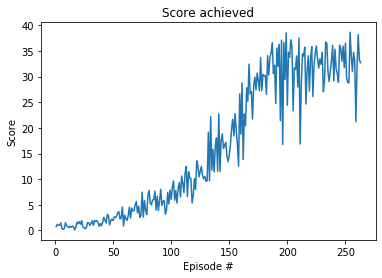

In [23]:
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(1, len(scores)+1), scores)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.title('Score achieved')
plt.show()

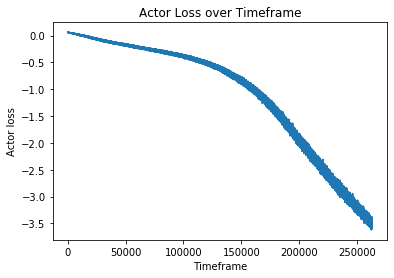

In [28]:
import matplotlib.pyplot as plt
agent.actor_loss

fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(1, len(agent.actor_loss)+1), agent.actor_loss)
plt.ylabel('Actor loss')
plt.xlabel('Timeframe')
plt.title('Actor Loss over Timeframe')
plt.show()

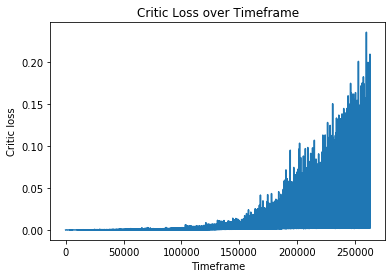

In [27]:
import matplotlib.pyplot as plt
agent.actor_loss

fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(1, len(agent.critic_loss)+1), agent.critic_loss)
plt.ylabel('Critic loss')
plt.xlabel('Timeframe')
plt.title('Critic Loss over Timeframe')
#plt.xlim(100, 17500)
plt.show()


In [31]:
env_info = env.reset(train_mode=False)[brain_name]   
env_info.vector_observations 

array([[ 0.00000000e+00, -4.00000000e+00,  0.00000000e+00,
         1.00000000e+00, -0.00000000e+00, -0.00000000e+00,
        -4.37113883e-08,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00, -1.00000000e+01,
         0.00000000e+00,  1.00000000e+00, -0.00000000e+00,
        -0.00000000e+00, -4.37113883e-08,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00, -6.78438568e+00,
        -1.00000000e+00, -4.23935175e+00,  0.00000000e+00,
         1.00000000e+00,  0.00000000e+00, -2.01535106e-01]])

In [32]:
# test the trained agent
agent = Agent(input_state_size,input_action_size)
agent.actor_local.load_state_dict(torch.load( './checkpoint_actor.pth'))
agent.critic_local.load_state_dict(torch.load( './checkpoint_critic.pth'))

for episode in range(3):
    env_info = env.reset(train_mode=False)[brain_name]        
    state = env_info.vector_observations       
    score = np.zeros(n_agents)               
    
    while True:
        action = agent.act(state, add_noise=False)                    
        
        env_info = env.step(action)[brain_name]        
        next_state = env_info.vector_observations     
        rewards = env_info.rewards       
        dones = env_info.local_done
        score += rewards
        state = next_state

        if np.any(dones):                              
            break

    print('Episode: \t{} \tScore: \t{:.2f}'.format(episode, np.mean(score)))      

Episode: 	0 	Score: 	38.96
Episode: 	1 	Score: 	39.43
Episode: 	2 	Score: 	39.24


In [ ]:
env.close()